#**My First ML Project**

#**LoadData**

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


#**Data Preparation**

##Data Separation as X &Y

In [ ]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [ ]:
x = df.drop('logS', axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


##**Data Splittng**
**Scikit-learn (sklearn) Train-Test_Split_FurtherProcess**

In [10]:
from sklearn.model_selection import train_test_split

#Split the data: 80% for training, 20% for testing
x_train, x_test, y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [11]:
#Check the shape of the data
x_train.shape, x_test.shape, y_train.shape, Y_test.shape

((915, 4), (229, 4), (915,), (229,))

In [12]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
643,3.61260,296.410,0.0,0.272727
722,6.48760,226.448,13.0,0.000000
570,3.15380,284.746,1.0,0.600000
66,0.77880,74.123,2.0,0.000000
1002,1.82140,102.177,3.0,0.000000
...,...,...,...,...
1044,2.82960,253.305,1.0,0.631579
1095,2.10750,218.322,3.0,0.000000
1130,4.14820,335.282,7.0,0.260870
860,4.25720,275.179,4.0,0.352941


In [13]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
218,1.55740,102.177,3.0,0.000000
809,5.20590,345.653,4.0,0.571429
501,4.18090,339.218,4.0,0.545455
649,2.05760,286.349,4.0,0.315789
323,0.72822,146.153,0.0,0.909091
...,...,...,...,...
361,-0.50840,59.068,0.0,0.000000
292,1.94750,116.204,3.0,0.000000
1119,2.16090,257.437,3.0,0.000000
557,3.36680,138.254,0.0,0.000000


#**Model Building: Train a model**

##**Linear Regression**

###**Training the model**

In [14]:
from sklearn.linear_model import LinearRegression

#create the model
model = LinearRegression()

#Train (fit) the model
model.fit(x_train, y_train)

LinearRegression()

###**Applying the model to make a prediction**

In [46]:
y_model_train_pred = model.predict(x_train)
y_model_test_pred = model.predict(x_test)

**Printing the results**
**{y_model_train_pred}**

In [20]:
y_model_train_pred

array([ -4.47026156,  -5.88839323,  -4.22029229,  -0.79352323,
        -1.73062942,  -1.26187649,  -1.43969557,  -2.36087206,
        -2.77481055,  -2.23755209,  -4.15424648,  -8.49226359,
        -4.26355722,  -1.5773174 ,  -2.61749814,  -0.72935686,
        -3.18513222,  -3.71048234,  -1.57995763,  -5.11539503,
        -1.90340063,  -4.18841892,  -4.85523085,  -2.13317387,
        -3.34701685,  -3.45842365,  -3.73715663,  -3.61882675,
        -3.02530867,  -2.82178231,  -1.54861269,  -2.73630968,
        -1.79353838,  -6.49056433,  -2.19068424,  -4.10802907,
        -2.7303035 ,  -2.28598248,  -2.60739155,  -3.64519507,
        -2.65218678,  -4.35285798,   1.91721982,  -3.70871993,
        -3.50138017,  -2.71898539,  -4.77720737,  -3.38184768,
        -1.71815824,  -2.79713356,  -5.26774517,  -2.96884167,
        -2.27709013,  -2.76017539,  -2.12748391,  -2.3140745 ,
        -7.74681081,  -3.21253144,  -1.76376134,  -4.17337487,
        -2.93249251,  -0.51506669,  -3.06834756,  -0.72

**Printing the results**
**{y_model_test_pred}**

In [21]:
y_model_test_pred

array([-1.53917269, -6.08287944, -5.28375883, -3.27746087, -1.70320929,
       -5.63167711, -1.43239582, -2.74544339, -3.43274443, -3.79048137,
       -1.26884289, -1.54861269, -3.72258406, -3.25962057, -3.76344744,
       -2.13317387, -2.00365994, -4.80828381, -1.43582956, -2.81358533,
       -2.37870232, -1.45080608, -3.71048234, -3.06158669, -1.12854214,
       -1.11007232, -2.45566761, -5.0338893 , -3.29087978, -4.21832264,
       -2.45834377, -3.09200621, -3.89726792, -1.85208473, -2.17761301,
       -6.01542152, -1.06493784, -2.35071265, -1.72034021, -1.45695216,
       -1.85208473, -6.66998091, -1.23899725, -1.46015868, -1.65115215,
       -3.79048137, -4.73551134, -1.09859266, -0.69404611, -1.91048017,
       -3.16121056, -2.34753749, -2.01980335, -2.51436431, -7.04012802,
       -5.27488937, -4.18979204, -2.9647599 , -1.7364388 , -1.64388527,
       -4.60884756, -4.84900677, -0.18955927, -1.73839902, -1.63779456,
       -2.01616982, -1.46391856, -7.64117637, -1.34518182, -2.28

###**Evaluate modelmodel performance**

In [23]:
y_train

,logS
643,-4.300
722,-8.400
570,-3.754
66,0.000
1002,-1.340
...,...
1044,-3.324
1095,-1.620
1130,-5.680
860,-4.770


In [25]:
y_model_train_pred

array([ -4.47026156,  -5.88839323,  -4.22029229,  -0.79352323,
        -1.73062942,  -1.26187649,  -1.43969557,  -2.36087206,
        -2.77481055,  -2.23755209,  -4.15424648,  -8.49226359,
        -4.26355722,  -1.5773174 ,  -2.61749814,  -0.72935686,
        -3.18513222,  -3.71048234,  -1.57995763,  -5.11539503,
        -1.90340063,  -4.18841892,  -4.85523085,  -2.13317387,
        -3.34701685,  -3.45842365,  -3.73715663,  -3.61882675,
        -3.02530867,  -2.82178231,  -1.54861269,  -2.73630968,
        -1.79353838,  -6.49056433,  -2.19068424,  -4.10802907,
        -2.7303035 ,  -2.28598248,  -2.60739155,  -3.64519507,
        -2.65218678,  -4.35285798,   1.91721982,  -3.70871993,
        -3.50138017,  -2.71898539,  -4.77720737,  -3.38184768,
        -1.71815824,  -2.79713356,  -5.26774517,  -2.96884167,
        -2.27709013,  -2.76017539,  -2.12748391,  -2.3140745 ,
        -7.74681081,  -3.21253144,  -1.76376134,  -4.17337487,
        -2.93249251,  -0.51506669,  -3.06834756,  -0.72

**Evaluate modelmodel performance**

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
model_train_mse = mean_squared_error(y_train, y_model_train_pred)
model_train_r2 = r2_score(y_train, y_model_train_pred)

model_test_mse = mean_squared_error(Y_test, y_model_test_pred)
model_test_r2 = r2_score(Y_test, y_model_test_pred)

In [31]:
print('Model training performance')
print('Model MSE Train:', model_train_mse)
print('Model R2 Train:', model_train_r2)
print('----------------------------------')
print('Model test performance')
print('Model MSE Test:', model_test_mse)
print('Model R2 Test:', model_test_r2)

Model training performance
Model MSE Train: 1.0139894491573003
Model R2 Train: 0.7695127746587307
----------------------------------
Model test performance
Model MSE Test: 0.9990844407075306
Model R2 Test: 0.7705650058569232


In [39]:
model_results = pd.DataFrame(['Linear regression:', model_train_mse, model_train_r2, model_test_mse, model_test_r2]).transpose()

model_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [42]:
model_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression:,1.013989,0.769513,0.999084,0.770565


##**Random Forest**

###**Training the model**

In [44]:
from sklearn.ensemble import RandomForestRegressor

#create the model
rf = RandomForestRegressor(max_depth=2, random_state=100)

#Train (fit) the model
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

###**Applying the model to make a prediction**

In [47]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

###**Evaluate model performance**

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(Y_test, y_rf_test_pred)
rf_test_r2 = r2_score(Y_test, y_rf_test_pred)

In [52]:
rf_results = pd.DataFrame(['Linear regression:', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()

rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

rf_results


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression:,1.057186,0.759694,1.05209,0.758393


##**Model Comparison**

In [57]:
df_model = pd.concat([model_results, rf_results], axis=0)
df_model

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression:,1.013989,0.769513,0.999084,0.770565
0,Linear regression:,1.057186,0.759694,1.05209,0.758393


In [59]:
df_model = pd.concat([model_results, rf_results], axis=0).reset_index(drop=True)
df_model

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression:,1.013989,0.769513,0.999084,0.770565
1,Linear regression:,1.057186,0.759694,1.05209,0.758393


In [60]:
df_model.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression:,1.013989,0.769513,0.999084,0.770565
1,Linear regression:,1.057186,0.759694,1.05209,0.758393


#**Data visualisation of prediction result**

##**Data visualisation of prediction result I**

[]

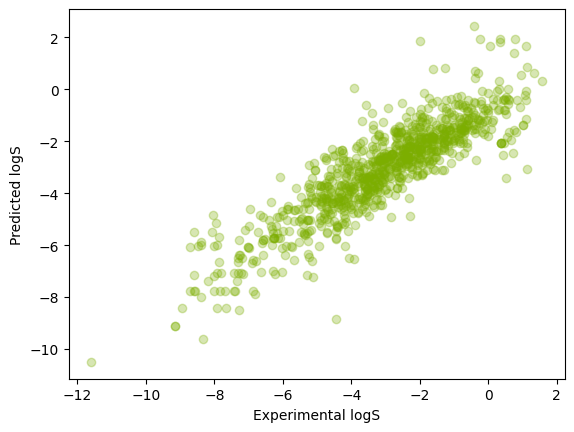

In [69]:
import matplotlib.pyplot as plt
plt.scatter(x=y_train, y=y_model_train_pred, c="#7CAE00", alpha=0.3)

#Since X & Y axis aren't label yer
plt.xlabel('Experimental logS')
plt.ylabel('Predicted logS')

plt.plot()

##**Data visualisation of prediction result II**

Text(0, 0.5, 'Predicted logS')

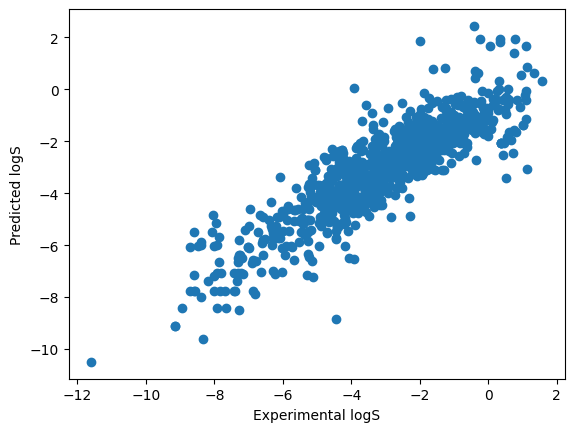

In [78]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_model_train_pred)
plt.xlabel('Experimental logS')
plt.ylabel('Predicted logS')

##**Data visualisation of prediction result III**

[]

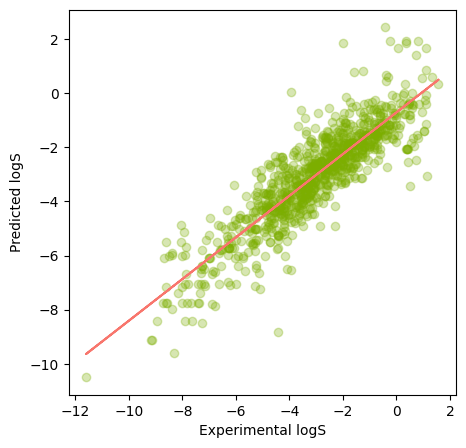

In [80]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_model_train_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(y_train, y_model_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')

#Since X & Y axis aren't label yer
plt.xlabel('Experimental logS')
plt.ylabel('Predicted logS')

plt.plot()